In [2]:
import pickle
from nilearn.glm.second_level import SecondLevelModel
from nilearn.glm.second_level import non_parametric_inference
from nilearn import plotting
from nilearn.plotting import plot_stat_map
import scipy.stats as st
import matplotlib.pyplot as plt
from nilearn.image import threshold_img
import pandas as pd

from atlasreader import create_output


# open a file, where you ant to store the data
file = open('./models/first_level_all_hyp1.pkl', 'rb')

# dump information to that file
data = pickle.load(file)

# close the file
file.close()

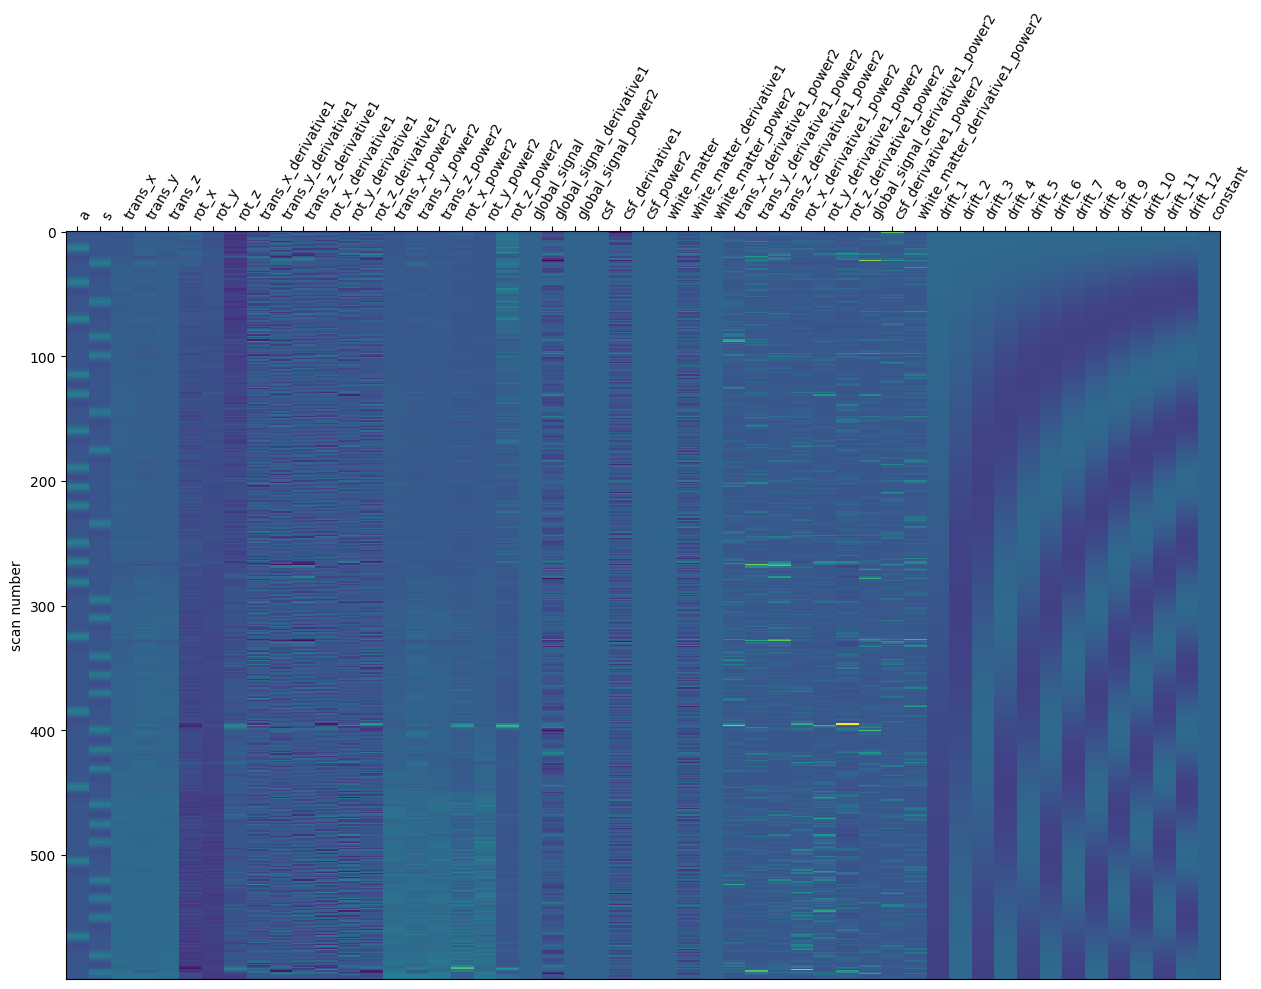

In [16]:
from nilearn.plotting import plot_design_matrix
# View the design matrix from the first session
design_matrix = data[0][0].design_matrices_[3]

#Plot the design matrix
plot_design_matrix(design_matrix)
plt.show()

In [3]:

#We will simply add the models estimated above to the second level
second_level_input = data[0]

#Adding the smoothing parameter
second_level_model = SecondLevelModel(smoothing_fwhm=8.0)
second_level_model = second_level_model.fit(second_level_input)

/work/balazs_folder/virt_env/lib/python3.12/site-packages/nilearn/glm/second_level/second_level.py:361: UserWarning: One contrast given, assuming it for all 4 runs
  sample_map = sample_model.compute_contrast(


In [4]:
contrasts = ['a - s']
zmap_g = second_level_model.compute_contrast(
    first_level_contrast= contrasts[0])

/work/balazs_folder/virt_env/lib/python3.12/site-packages/nilearn/glm/second_level/second_level.py:307: UserWarning: One contrast given, assuming it for all 4 runs
  effect_map = model.compute_contrast(
/work/balazs_folder/virt_env/lib/python3.12/site-packages/nilearn/glm/second_level/second_level.py:307: UserWarning: One contrast given, assuming it for all 4 runs
  effect_map = model.compute_contrast(
/work/balazs_folder/virt_env/lib/python3.12/site-packages/nilearn/glm/second_level/second_level.py:307: UserWarning: One contrast given, assuming it for all 4 runs
  effect_map = model.compute_contrast(
/work/balazs_folder/virt_env/lib/python3.12/site-packages/nilearn/glm/second_level/second_level.py:307: UserWarning: One contrast given, assuming it for all 4 runs
  effect_map = model.compute_contrast(
/work/balazs_folder/virt_env/lib/python3.12/site-packages/nilearn/glm/second_level/second_level.py:307: UserWarning: One contrast given, assuming it for all 4 runs
  effect_map = model.com

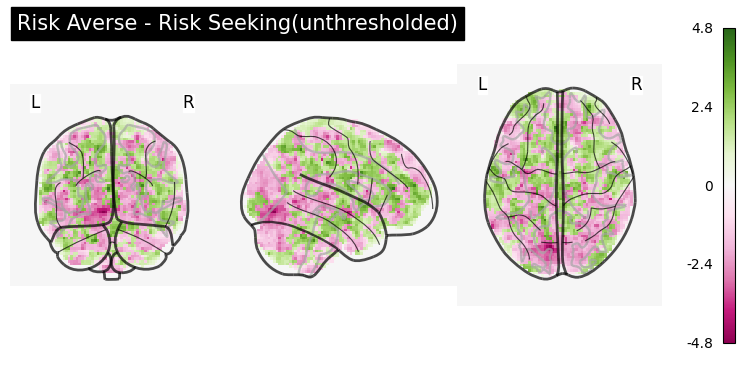

In [5]:

plotting.plot_glass_brain(zmap_g, cmap='PiYG',colorbar=True, threshold=None,
                          title='Risk Averse - Risk Seeking(unthresholded)',
                          plot_abs=False)
plt.show()

In [6]:
p001uncor=st.norm.ppf(.9999)
zmap_t = threshold_img(zmap_g, threshold=p001uncor)

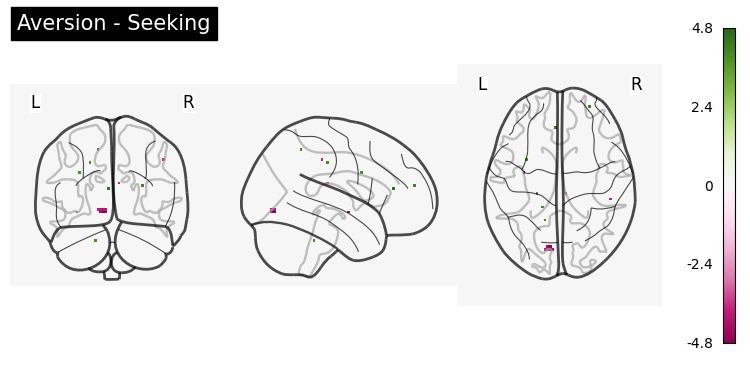

In [7]:
plotting.plot_glass_brain(zmap_t, cmap='PiYG',colorbar=True, threshold=None,
                          title="Aversion - Seeking",
                          plot_abs=False)
plt.show()

In [8]:
create_output(zmap_t, cluster_extent = 5, outdir = "./results/hyp1")
pd.options.display.max_colwidth = 1000
clusters = pd.read_csv("./results/hyp1/atlasreader_clusters.csv")



In [10]:
clusters

,cluster_id,peak_x,peak_y,peak_z,cluster_mean,volume_mm,aal,desikan_killiany,harvard_oxford
0,1.0,-8.089999,-76.927999,-8.5,-4.229957,127.613525,100.00% Lingual_L,50.00% ctx-lh-lingual; 50.00% Left-Cerebral-White-Matter,100.00% Left_Lingual_Gyrus


In [9]:
clusters["harvard_oxford"]

0    100.00% Left_Lingual_Gyrus
Name: harvard_oxford, dtype: object

/work/balazs_folder/virt_env/lib/python3.12/site-packages/nilearn/glm/thresholding.py:297: UserWarning: The given float value must not exceed 4.793727143762295. But, you have given threshold=5.036123199575215.
  stat_img = threshold_img(


The p<.05 FWER-corrected threshold is 5.04


/work/balazs_folder/virt_env/lib/python3.12/site-packages/nilearn/plotting/displays/_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


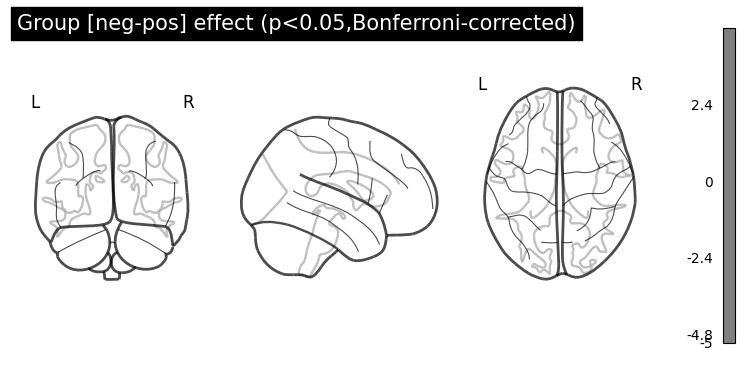

In [9]:
from nilearn.glm import threshold_stats_img

thresholded_map, threshold = threshold_stats_img(
    zmap_g, alpha=0.05, height_control='bonferroni')
print('The p<.05 FWER-corrected threshold is %.3g' % threshold)

plotting.plot_glass_brain(zmap_g, cmap='PiYG',colorbar=True, threshold=threshold,
                          title='Group [neg-pos] effect (p<0.05,Bonferroni-corrected)',
                          plot_abs=False)
plt.show()

# Make a table of cluster coordinates.
#table = get_clusters_table(zmap_g, stat_threshold=threshold)
#print(table)